<a href="https://colab.research.google.com/github/kanaksvip/Unsupervised-ML/blob/main/Clustering%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KANAKSVI PACHOLI**

**THE SPARKS FOUNDATION**

**TASK 2- PREDICTION USING UNSUPERVISED ML**


#**Importing the libraries**

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**Loading the dataset**

In [110]:
data_load = pd.read_excel("Iris_Dataset.xlsx")                                     
print("Successfully imported data" ) 
data_load.head(6)

Successfully imported data


,Sepal Length (Cm),Sepal Width (Cm),Petal Length(Cm),Petal Width (Cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


#**Determining optimum number of clusters**

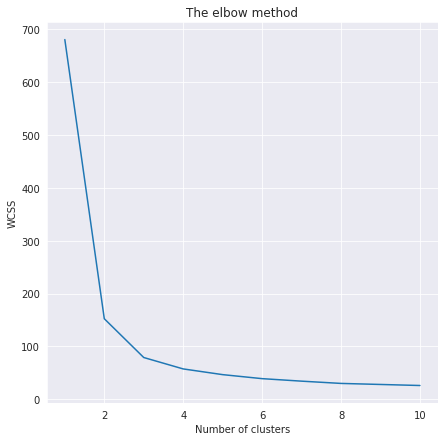

In [111]:
x = data_load.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=[7,7])    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')                                                              #Within cluster sum of squares
plt.show()

#**Creating K-means classifier and plotting the clusters**

In K-Means, each cluster is associated with a centroid.


In [112]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

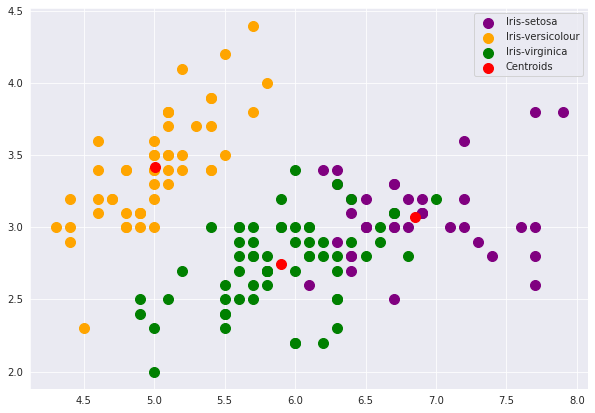

In [113]:
plt.figure(figsize=[10,7])
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], 
            s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()

#**Labelling the predictions and adding to dataset**

In [114]:
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)                       #considering 0 Corresponds to 'Iris-setosa'
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)                #1 to 'Iris-versicolour'
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)                  #2 to 'Iris-virginica'

data_with_clusters = data_load.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(6))

   Sepal Length (Cm)  Sepal Width (Cm)  ...      Species           Cluster
0                5.1               3.5  ...  Iris-setosa  Iris-versicolour
1                4.9               3.0  ...  Iris-setosa  Iris-versicolour
2                4.7               3.2  ...  Iris-setosa  Iris-versicolour
3                4.6               3.1  ...  Iris-setosa  Iris-versicolour
4                5.0               3.6  ...  Iris-setosa  Iris-versicolour
5                5.4               3.9  ...  Iris-setosa  Iris-versicolour

[6 rows x 6 columns]


#**Data Visualisation**

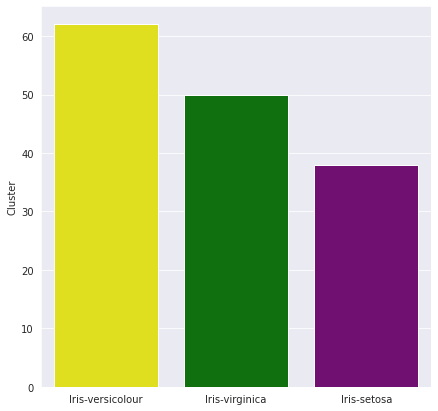

In [115]:
import seaborn as sns
plt.figure(figsize=[7,7])
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["yellow", "green", "purple"]));

#**Conclusion**
**Predicted number of clusters in-**

Iris-versicolour is 62     
Iris-virginica is 50     
Iris-setosa is 38

